# 13.1. Các bước của thuật toán k-Means Clustering

Trong thuật toán k-Means mỗi cụm dữ liệu được đặc trưng bởi một _tâm_ (_centroid_). _tâm_ là điểm đại diện nhất cho một cụm và có giá trị bằng trung bình của toàn bộ các quan sát nằm trong cụm. Chúng ta sẽ dựa vào khoảng cách từ mỗi quan sát tới các _tâm_ để xác định nhãn cho chúng trùng thuộc về _tâm_ gần nhất. Ban đầu thuật toán sẽ khởi tạo ngẫu nhiên một số lượng xác định trước tâm cụm. Sau đó tiến hành xác định nhãn cho từng điểm dữ liệu và tiếp tục cập nhật lại tâm cụm. Thuật toán sẽ dừng cho tới khi toàn bộ các điểm dữ liệu được phân về đúng cụm hoặc số lượt cập nhật tâm chạm ngưỡng. 

Cụ thể các bước của thuật toán k-Means được tóm tắt như sau:

1.- Khởi tạo ngẫu nhiên $k$ tâm cụm $\mu_1, \mu_2, \dots, \mu_k$.

2.- Lặp lại quá trình cập nhật tâm cụm cho tới khi dừng:

  a. Xác định nhãn cho từng điểm dữ liệu $c_i$ dựa vào khoảng cách tới từng tâm cụm:
  
  $$c_i = \arg \min_{j} \|\mathbf{x}_i - \mu_j \|_2^2$$

  b. Tính toán lại tâm cho từng cụm theo trung bình của toàn bộ các điểm dữ liệu trong một cụm:

  $$\mu_j := \frac{\sum_{i=1}^{n} \mathbf{1}(c_i = j) \mathbf{x}_i}{\sum_{i=1}^{n} \mathbf{1}(c_i = j)}$$

Trong công thức 2.a thì $\|\mathbf{x}\|_2^2$ là bình phương của norm chuẩn bậc 2, kí hiệu là $L_2$, norm chuẩn bậc 2 là một độ đo khoảng cách thường được sử dụng trong machine learning. 

Trong công thức 2.b chúng ta sử dụng hàm $\mathbf{1}(.)$, hàm này có giá trị trả về là 1 nếu nhãn của điểm dữ liệu $c_i$ được dự báo thuộc về cụm $j$, trái lại thì trả về giá trị 0. Như vậy tử số của vế phải trong công thức 2.b chính là tổng khoảng cách của toàn bộ các điểm dữ liệu nằm trong cụm $j$ trong khi mẫu số chính là số lượng các điểm dữ liệu thuộc cụm $j$. $\mu_j$ chính là vị trí của tâm cụm $j$ mà ta dự báo tại thời điểm hiện tại. Trong thuật toán trên thì tham số mà chúng ta cần lựa chọn chính là số lượng cụm $k$. Thời điểm ban đầu ta sẽ khởi tạo $k$ điểm dữ liệu một cách ngẫu nhiên và sau đó gán các tâm bằng giá trị của $k$ điểm dữ liệu này. Các bước trong vòng lặp ở bước 2 thực chất là: 

a. Gán nhãn cho mỗi điểm dữ liệu bằng với nhãn của tâm cụm gần nhất.

b. Dịch chuyển dần dần tâm cụm $\mu_j$ tới trung bình của những điểm dữ liệu mà được phân về $j$.

Bên dưới ta sẽ xây dựng một class `KMean` từ đầu để phân cụm dữ liệu. Hàm quan trọng nhất là `fit()` có tác dụng huấn luyện theo vòng lặp thuật toán `KMean()`.
Hàm `get_labels()` được sử dụng để phân các điểm dữ liệu về đúng nhãn của cụm. Trong khi đó `get_centroids()` được sử dụng để xác định tâm của các cụm dựa trên nhãn. Hàm `should_stop()` có tác dụng kiểm tra điều kiện dừng của vòng lặp. Ở đây chúng ta sẽ dừng khi số lượng vòng lặp vượt quá `max_iteration` hoặc các centroids ngừng thay đổi.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs


class KMeans():
  def __init__(self, k, max_iteration=10):
      self.k = k
      self.max_iteration = max_iteration
      self.all_centroids = []
      self.all_labels = []

  # Hàm thuật toán k-Means lấy đầu vào là một bộ dữ liệu và số lượng cluster k. Trẻ về tâm của k cụm
  def fit(self, dataSet):
      # Khởi tạo ngẫu nhiên k centroids
      numFeatures = dataSet.shape[1]
      centroids = self.get_random_centroids(numFeatures, self.k)
      self.all_centroids.append(centroids)
      self.all_labels.append(None)

      # Khởi tạo các biến iterations, oldCentroids
      iterations = 0
      oldCentroids = None
      
      # Vòng lặp cập nhật centroids trong thuật toán k-Means
      while not self.should_stop(oldCentroids, centroids, iterations):
          # Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
          oldCentroids = centroids
          iterations += 1
          
          # Gán nhãn cho mỗi diểm dữ liệu dựa vào centroids
          labels = self.get_labels(dataSet, centroids)
          self.all_labels.append(labels)

          # Cập nhật centroids dựa vào nhãn dữ liệu
          # print('0ld centroids: ', centroids)
          centroids = self.get_centroids(dataSet, labels, self.k)
          # print('new centroids: ', centroids)
          self.all_centroids.append(centroids)
  
      return centroids

  # Hàm khởi tạo centroids ngẫu nhiên
  def get_random_centroids(self, numFeatures, k):
    return np.random.rand(k, numFeatures)
    # return np.array([[-5., -5.],
    #                  [4., 6.]])

  # Hàm này trả về nhãn cho mỗi điểm dữ liệu trong datasets
  def get_labels(self, dataSet, centroids):
      # Với mỗi quan sát trong dataset, lựa chọn centroids gần nhất để gán label cho dữ liệu.
      labels = []
      for x in dataSet:
        # Tính khoảng cách tới các centroids và cập nhận nhãn
        distances = np.sum((x-centroids)**2, axis=1)
        label = np.argmin(distances)
        labels.append(label)
      return labels
      
  # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
  # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
  def should_stop(self, oldCentroids, centroids, iterations):
      if iterations > self.max_iteration: 
        return True
      return np.all(oldCentroids == centroids)

  # Trả về toan độ mới cho k centroids của mỗi chiều.
  def get_centroids(self, dataSet, labels, k):
      centroids = []
      for j in np.arange(k):
        # Lấy index cho mỗi centroids
        idx_j = np.where(np.array(labels) == j)[0]
        centroid_j = dataSet[idx_j, :].mean(axis=0)
        centroids.append(centroid_j)
      return np.array(centroids)

In [2]:
dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

kmean = KMeans(k=2, max_iteration=8)
centroids = kmean.fit(dataset)

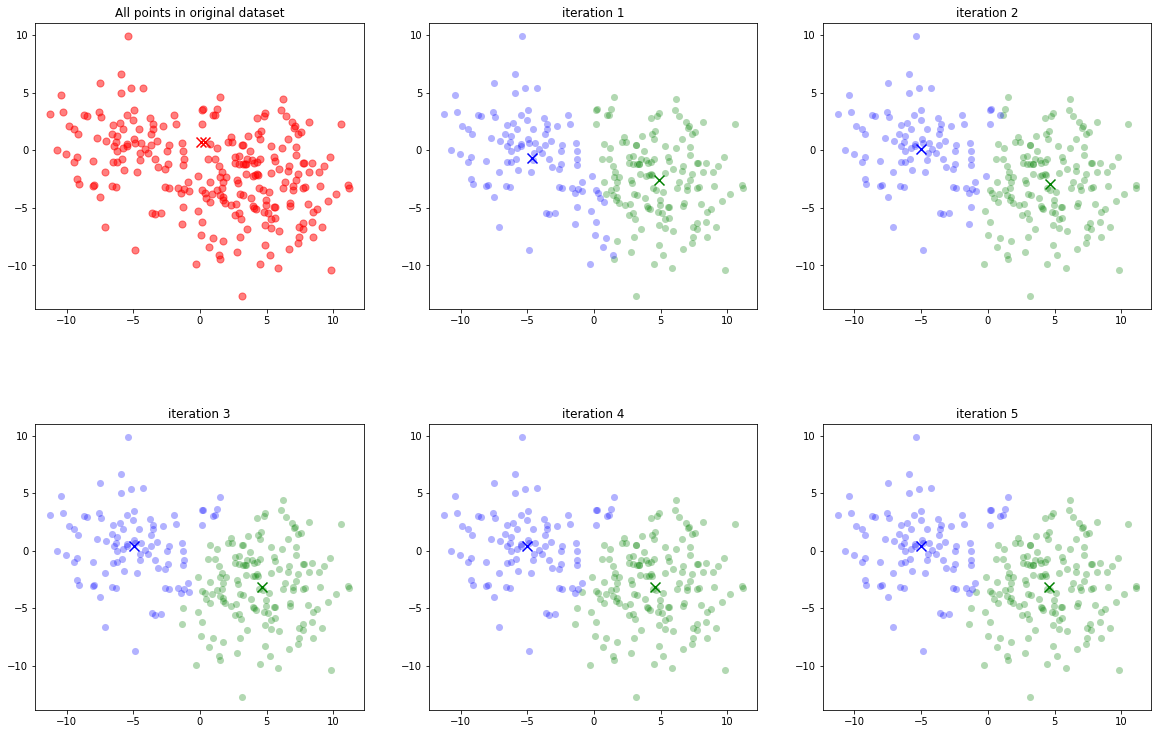

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = ['green', 'blue']
labels = ['cluster 1', 'cluster 2']

for i in np.arange(len(kmean.all_centroids)):
  ax = plt.subplot(gs[i])
  if i == 0:
    centroids_i = kmean.all_centroids[i]
    plt.scatter(dataset[:, 0], dataset[:, 1], s=50, alpha=0.5, color='red')
    for j in np.arange(kmean.k):
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
    plt.title('All points in original dataset')
  else:
    # Lấy centroids và labels tại bước thứ i
    centroids_i = kmean.all_centroids[i]
    labels_i = kmean.all_labels[i]
    # Visualize các điểm cho từng cụm
    for j in np.arange(kmean.k):
      idx_j = np.where(np.array(labels_i) == j)[0]
      plt.scatter(dataset[idx_j, 0], dataset[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color=colors[j], s=100, label=labels[j])
    plt.title(r'iteration {}'.format(i))

**Hình 1:** Sự dịch chuyển tâm của cụm sau mỗi vòng lặp. Thời điểm ban đầu hai tâm cụm được khởi tạo một cách ngẫu nhiên. Sau đó sau mỗi vòng lặp thì các nhãn được cập nhật lại tuỳ theo vị trí của chúng đối với tâm cụm. Tiếp tục cập nhật lại tâm cụm theo các nhãn dữ liệu mới. Cuối cùng thì thuật toán sẽ hội tụ khi tâm cụm ngừng thay đổi vị trí.

Trên sklearn chúng ta có thể dễ dàng huấn luyện thuật toán k-Means thông qua class `KMeans` của `sklearn.cluster`

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(dataset)
print('kmeans labels of 5 observation: ', kmeans.labels_[:5])
print('kmeans centroids: \n', kmeans.cluster_centers_)

kmeans labels of 5 observation:  [0 0 0 1 0]
kmeans centroids: 
 [[ 4.58876493 -3.13006162]
 [-4.99023469  0.44409831]]


Dự báo cụm cho một quan sát mới:

In [5]:
x = np.array([[5, 1]])
kmeans.predict(x)

array([0], dtype=int32)

# 13.2. Sự hội tụ của thuật toán k-Means clustering

Liệu rằng thuật toán k-Means luôn hội tụ? Điều này là hợp lý, chúng ta sẽ chứng minh thông qua xét một _hàm biến dạng_ (_distortion function_) dạng MSE:

$$\mathcal{L}(\mathbf{c}, \mu) = \sum_{i=1}^{n} \sum_{j=1}^{k} \|\mathbf{x}_i-\mathbf{1}(c_i=j)\mu_{j} \|_2^2$$

Trong đó $\mathbf{c}=(c_1, c_2, \dots, c_n)$ là véc tơ nhãn của toàn bộ các quan sát được dữ báo từ thuật toán phân cụm. $\mathbf{1}(c_i=j)\mu_j$ chính là tâm cụm mà quan sát $\mathbf{x}_i$ được phân bổ về. Như vậy _hàm biến dạng_ thực tế là đo lường khoảng cách từ toàn bộ các điểm dữ liệu đến các tâm cụm. Theo như bước 2 trong qui trình của thuật toán k-Means thì đầu tiên tại bước 2.a chúng ta sẽ tính khoảng cách từ một điểm dữ liệu đến toàn bộ các tâm cụm nhằm cập nhật lại nhãn. Như vậy giá trị $\|\mathbf{x}_i-\mathbf{1}(c_i=j)\mu_{j} \|_2^2$ luôn giảm sau bước này. Tiếp theo sang bước thứ 2.b chúng ta cập nhật lại tâm cụm sao cho khoảng cách của chúng tới các điểm trong dữ liệu là nhỏ nhất. Vị trí này là nghiệm của phương trình đạo hàm bậc nhất:

$$\begin{eqnarray}\frac{\delta \mathcal{L}(\mathbf{c}, \mu)}{\delta \mu_j} & = & \sum_{i=1}^{n} \sum_{j=1}^{k} \frac{\delta ~ \|\mathbf{x}_i-\mathbf{1}(c_i=j)\mu_j \|_2^2}{\delta \mu_j} \\
& = & \sum_{i=1}^{n} \sum_{j=1}^{k} \frac{\delta ~ [\mathbf{x}_i-\mathbf{1}(c_i=j)\mu_j]^{\intercal} [\mathbf{x}_i-\mathbf{1}(c_i=j)\mu_j]}{\delta \mu_j} \\
& = & \sum_{i=1}^{n} \sum_{j=1}^{k}-\mathbf{1}(c_i = j) [\mathbf{x}_i - \underbrace{\mathbf{1}(c_i=j)}_{1} \mu_j] \\
& = & \sum_{i=1}^{n} \sum_{j=1}^{k}-\mathbf{1}(c_i = j) [\mathbf{x}_i - \mu_j]
\end{eqnarray}$$

Dòng thứ 2 suy ra dòng thứ 3 là theo công thức đạo hàm của $\| \mathbf{x} - \mathbf{w}\|_2^2$.

Dòng thứ 3 suy ra dòng thứ 4 là vì khi nhãn $c_i = j$ thì $\mathbf{1}(c_i=j) = 1$. Trường hợp nhãn $c_i \neq j$ thì là khoảng cách được gán về 0 và không ảnh hưởng tới tới _hàm biến dạng_.

Như vậy đạo hàm bậc nhất bằng 0 khi:

$$\begin{eqnarray}\sum_{i=1}^{n} \sum_{j=1}^{k}-\mathbf{1}(c_i = j) [\mathbf{x}_i - \mu_j^*] & = & 0 \\
\leftrightarrow \mu_j^* & = & \frac{\sum_{i=1}^{n} \mathbf{1}(c_i = j) \mathbf{x}_i}{\sum_{i=1}^{n} \mathbf{1}(c_i = j)}
\end{eqnarray}$$

Như vậy khi tâm cụm là trung bình của toàn bộ các quan sát được phân về cụm thì tổng khoảng cách giữa các quan sát tới thâm cụm mà nó thuộc về là nhỏ nhất. Điều đó có nghĩa là _hàm biến dạng_ luôn giảm sau mỗi vòng lặp. Mặt khác _hàm biến dạng_ bị chặn dưới bởi 0 nên là một chuỗi hội tụ. Tức là sau một hữu hạn bước thì thuật toán k-Means sẽ dừng.

# 13.3. Phương pháp Elbow trong lựa chọn số cụm

Trong thuật toán k-Means thì chúng ta cần phải xác định trước số cụm. Câu hỏi đặt ra là đâu là số lượng cụm cần phân chia tốt nhất đối với một bộ dữ liệu cụ thể? Phương pháp Elbow là một cách giúp ta lựa chọn được số lượng các cụm phù hợp dựa vào đồ thị trực quan hoá bằng cách nhìn vào sự suy giảm của _hàm biến dạng_ và lựa chọn ra điểm _khuỷ tay_ (_elbow point_). Để tìm hiểu phương pháp Elbow, bên dưới chúng ta cùng thử nghiệm vẽ biểu đồ _hàm biến dạng_ bằng cách điều chỉnh số lượng cụm của thuật toán k-Means.

In [6]:
from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(1, K):
  # 1.  Huấn luyện với số cụm = i
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(dataset)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
  d2centroids = cdist(dataset, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
  min_distance = np.min(d2centroids, axis=1) # shape (n)
  loss = np.sum(min_distance)
  losses.append(loss)

Vẽ biểu đồ _hàm biến dạng_

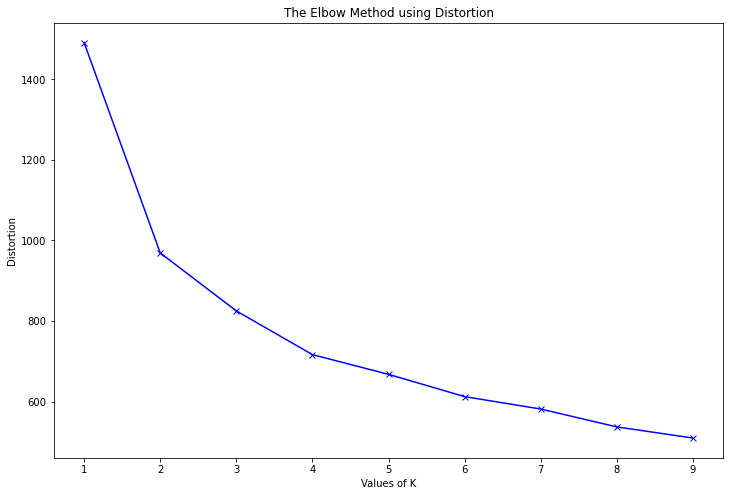

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

**Hình 2:** Đồ thị _hàm biến dạng_ của thuật toán k-Means. Trục tung là giá trị của _hàm biến dạng_ và trục hoành là giá trị của số lượng cụm cần phân chia trong thuật toán k-Means. 

Điểm _khuỷ tay_ là điểm mà ở đó tốc độ suy giảm của _hàm biến dạng_ sẽ thay đổi nhiều nhất. Tức là kể từ sau vị trí này thì gia tăng thêm số lượng cụm cũng không giúp _hàm biến dạng_ giảm đáng kể. Nếu thuật toán phân chia theo số lượng cụm tại vị trí này sẽ đạt được tính chất phân cụm một cách tổng quát nhất mà không gặp các hiện tượng _vị khớp_ (_overfitting_). Trong hình trên thì ta thấy vị trí của điểm _khuỷ tay_ chính là $k=2$ vì khi số lượng cụm lớn hơn $2$ thì tốc độ suy giảm của _hàm biến dạng_ dường như không đáng kể so với trước đó.

Phương pháp Elbow là một phương pháp thường được sử dụng để lựa chọn số lượng cụm phân chia hợp lý dựa trên biểu đồ, tuy nhiên có một số trường hợp chúng ta sẽ không dễ dàng phát hiện vị trí của Elbow, đặc biệt là đối với những bộ dữ liệu mà qui luật phân cụm không thực sự dễ dàng được phát hiện. Nhưng nhìn chung thì phương pháp Elbow vẫn là một phương pháp tốt nhất được ứng dụng trong việc tìm kiếm số lượng cụm cần phân chia.

# 13.4. Biểu diễn dữ liệu đa chiều trên đồ thị

Sau khi huấn luyện thuật toán k-Means chúng ta sẽ cần kiểm tra qui luật phân cụm xem chúng đã thực sự hợp lý? Điều này sẽ được thực hiện thông qua biểu đồ phân cụm. Đối với các bộ dữ liệu hai chiều và ba chiều chúng ta có thể dễ dàng biểu diễn chúng trên mặt phẳng hoặc siêu phẳng. Nhưng đối với các bộ dữ liệu nhiều hơn ba chiều thì chúng ta cần áp dụng các phương pháp giảm chiều dữ liệu trước khi đồ thị hoá. 

Giảm chiều dữ liệu là phương pháp giúp biến đổi các bộ dữ liệu _cao chiều_ (_high dimensional_) về các bộ dữ liệu _thấp chiều_ (_low dimensional_) mà vẫn giữ được nhiều nhất thông tin từ bộ dữ liệu gốc. Về các phương pháp giảm chiều dữ liệu sẽ được giới thiệu ở một bài khác. Trong chương này chúng ta sẽ học cách ứng dụng thuật toán t-SNE để giảm chiều dữ liệu về hai chiều và biểu diễn qui luật các cụm trong không gian hai chiều.

Đầu tiên chúng ta sẽ huấn luyện một mô hình k-Means với 2 cụm trên bộ dữ liệu 3 chiều.

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Khởi tạo dữ liệu một cách ngẫu nhiên
X, _ = make_blobs(n_samples=250, centers=2, 
                        n_features=2, cluster_std=3.0,
                        random_state=123)

# Hồi qui mô hình với 2 cụm
kmean = KMeans(n_clusters=2, random_state=0)
centroids = kmean.fit(X)

# Dự báo nhãn cho các cụm trên tập X
labels = kmean.predict(X)

Để huấn luyện mô hình `t-SNE` trên sklearn chúng ta sử dụng class [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Chúng ta cần khai báo số lượng chiều dữ liệu sau khi giảm thông qua đối số `n_components` như sau:

In [9]:
from sklearn.manifold import TSNE
import time

time_start = time.time()

# Biến đổi dữ liệu về 2 chiều
X_tsne = TSNE(n_components=2, random_state=123).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.6428377628326416 seconds


Hàm `fit_transform()` có tác dụng vừa huấn luyện vừa biến đổi dữ liệu, kết quả trả ra là bộ dữ liệu được giảm chiều `X_tsne`.

In [10]:
print(X_tsne.shape)

(250, 2)


Thông thường đối với các bộ dữ liệu kích thước lớn thì thuật toán t-SNE tốn khá nhiều thời gian để huấn luyện, chúng ta có thể in ra tổng thời gian huấn luyện để ước tính chi phí thời gian. 

Tiếp theo ta biều đồ hoá các cụm bằng biểu đồ scatter.

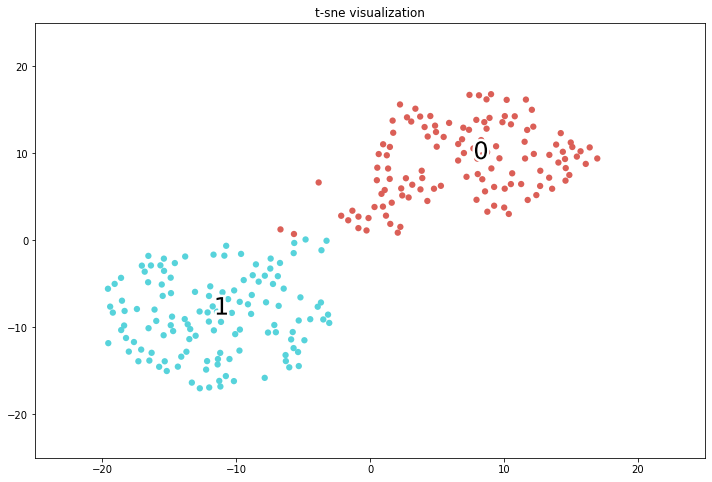

In [11]:
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(X_tsne, labels)

**Hình 3:** Biểu diễn của các cụm trên không gian 2D bằng phương pháp giảm chiều dữ liệu t-SNE.

Như vậy chúng ta nhận thấy rằng phép chiếu trên không gian hai chiều cho thấy thông tin cụm được bảo toàn và giữa các cụm có ranh giới rõ ràng. Bạn có đọc có thể áp dụng hàm `_plot_kmean_scatter()` ở trên để visualize cho những bộ dữ liệu khác trên không gian hai chiều. Các thông tin cần truyền vào hàm là dữ liệu sau giảm chiều `X_tsne` và nhãn dự báo `labels`.

# 13.5. Hạn chế của k-Means

Thuật toán k-Means có một số hạn chế đó là:

1. Chúng ta cần phải xác định trước số cụm cho thuật toán: Vì bộ dữ liệu của chúng ta chưa được gán nhãn nên dường như chúng ta không có thông tin nào về số lượng cụm hợp lý. Chúng ta chỉ có thể thực hiện phương pháp _thử và sai_ (_try and error_) và xác định số cụm thông qua một phương pháp chẳng hạn như Elbow.

2. Vị trí tâm của cụm sẽ bị phụ thuộc vào điểm khởi tạo ban đầu của chúng: Những vị trí khởi tạo khác nhau có thể dẫn tới cách phân cụm khác nhau, mặc dù thuật toán có cùng thiết lập số cụm.

3. Đối với những bộ dữ liệu có hình dạng phức tạp hoặc mất cân bằng thì thuật toán không hội tụ về qui luật phân chia tổng quát. Chẳng hạn như dữ liệu có dạng đường viền hình tròn bao ngoài một hình tròn ở bên trong nó; dữ liệu hình trôn ốc; dữ liệu có phân phối dẹt; dữ liệu bị mất cân bằng phân phối giữa các cụm.

4. Thuật toán rất nhạy cảm với outliers: Khi xuất hiện outliers thì thường khiến cho tâm cụm bị chệch và do đó dự báo cụm không còn chuẩn xác. Chính vì thế chúng ta cần phải loại bỏ outliers trước khi huấn luyện thuật toán.

5. Thuật toán nhạy cảm với độ lớn đơn vị của biến: Khi áp dụng thuật toán trên các biến có sự khác biệt về mặt đơn vị thì khoảng cách chủ yếu bị ảnh hưởng bởi các biến có đơn vị lớn hơn và khiến cho kết quả phân cụm bị chệch. Chính vì thế chúng ta cần phải chuẩn hoá biến để loại bỏ sự khác biệt đơn vị trước khi đưa vào huấn luyện mô hình.

6. Thuật toán k-Means yêu cầu phải tính khoảng cách từ một điểm tới toàn bộ các tâm cụm để tìm ra tâm cụm gần nhất. Như vậy chúng ta cần phải load toàn bộ dữ liệu lên RAM, đối với những bộ dữ liệu kích thước lớn thì sẽ vượt quá khả năng lưu trữ của RAM. Khi đó chúng ta cần phải huấn luyện thuật toán theo phương pháp online learning. Kĩ thuật này sẽ được giới thiệu ở bên dưới.

# 13.6. Online k-Means Clustering

Dữ liệu của các công ty công nghệ chẳng hạn như Facebook, Google, Amazon,... thường có đặc điểm là những bộ dữ liệu rất lớn và đòi hỏi phải cập nhật online. Chính vì thế chúng ta không thể huấn luyện một lần trên toàn bộ dữ liệu vì làm như vậy sẽ gây lãng phí về chi phí lưu trữ, chi phí tính toán và không đảm bảo được tính realtime. Khi đó phương pháp online learning là giải pháp tối ưu thường được sử dụng để huấn luyện mô hình. Theo phương pháp này, chúng ta lựa chọn ra ngẫu nhiên một điểm dữ liệu và thực hiện cập nhật lại tâm cụm theo _Gradient Descent_. Cách huấn luyện mô hình trên một điểm dữ liệu như vậy còn được gọi là _Stochastic Gradient Descent_. Trường hợp khác khi chúng ta cũng cập nhật nghiệm theo _Gradient Descent_, nhưng đối với đầu vào là một batch gồm nhiều điểm dữ liệu thì được gọi là _Mini-Batch Gradient Descent_. Phương pháp online learning vừa đảm bảo được tính realtime và tiết kiệm chi phí tính toán nên thường được áp dụng trong thực tiễn cho nhiều thuật toán khác nhau trong machine learning, không chỉ riêng k-Means.

Đối với thuật toán k-Means thì chúng ta sẽ tìm cách tối thiểu hoá _hàm biến dạng_ theo _gradient descent_. Tức là khi hệ thống xuất hiện một điểm dữ liệu mới $\mathbf{x}_i$ chúng ta sẽ xác định cụm mà điểm dữ liệu này sẽ thuộc về, chẳng hạn là $\mu_j$, sau đó cập nhật lại tâm của cụm theo công thức gradient:

$$\begin{eqnarray}\mu_{j} & :=  & \mu_{j}-\alpha \nabla_{\mu_j} \mathcal{L}(\mathbf{x}_i, \mu) \\
& = & \mu_j + \alpha(\mathbf{x}_i - \mu_j)
\end{eqnarray}$$

Trong đó $\alpha$ là hệ số _học tập_ (_learning rate_), thường được xác định là một giá trị rất nhỏ chẳng hạn từ 0.001 đến 0.03.

# 13.7. Tổng kết

Thuật toán k-Means là phương pháp đơn giản và thường được áp dụng trong các bài toán phân cụm. Thuật toán này dựa trên khoảng cách để cập nhật lại nhãn cho các quan sát về tâm gần nhất và tâm cụm sau đó được tính theo trung bình của toàn bộ các quan sát bên trong cụm. Chúng ta cũng chứng minh được rằng thuật toán sẽ hội tụ sau hữu hạn bước.

Tuy nhiên thuật k-Means vẫn là thuật toán tồn tại những hạn chế đó là cần phải xác định trước tâm cụm, vị trí tâm của cụm chịu sự phụ thuộc vào vị trí khởi tạo ban đầu của chúng, thuật toán cũng bị ảnh hưởng bởi outliers và sự khác biệt về đơn vị của biến đầu vào. Trong trường hợp các bộ dữ liệu có phân phối phức tạp và mất cân bằng thì thuật toán sẽ không phân cụm chính xác.

# 13.8. Bài tập

1. Thuật toán k-Means là thuộc lớp mô hình học có giám sát hay học không giám sát? vì sao?
2. Trình bày lại các bước trong thuật toán k-Means.
3. Tại sao thuật toán k-Means luôn hội tụ?
4. Những hạn chế của thuật toán k-Means là gì?
5. Phương pháp nào được sử dụng để xác định số lượng các cụm của thuật toán k-Means?
6. Khi huấn luyện thuật toán k-Means trên bộ dữ liệu nhiều hơn 3 chiều, làm thế nào để chúng ta có thể biểu diễn các cụm dữ liệu trong không gian 2 chiều hoặc 3 chiều?
7. Sử dụng bộ dữ liệu mnist (cách đọc bộ dữ liệu [mnist trên sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)), hãy huấn luyện thuật toán k-Means để phân cụm những bức ảnh. Xác định số lượng các cụm phù hợp thông qua phương pháp elbow.
8. Thực hiện giảm chiều dữ liệu theo phương pháp t-SNE và biểu diễn các cụm trong không gian hai chiều.
9. Nêu một vài ứng dụng của thuật toán k-Means trong kinh doanh.
10. Trong xử lý ảnh thuật toán k-Means thường được sử dụng để làm gì?

# 13.9. Tài liệu

http://cs229.stanford.edu/notes2020spring/cs229-notes7a.pdf

http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

https://www.sciencedirect.com/science/article/pii/S0167865504000996

https://www.datacamp.com/community/tutorials/introduction-t-sne

https://en.wikipedia.org/wiki/K-means_clustering

https://machinelearningcoban.com/2017/01/01/kmeans/